In [56]:
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

In [57]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

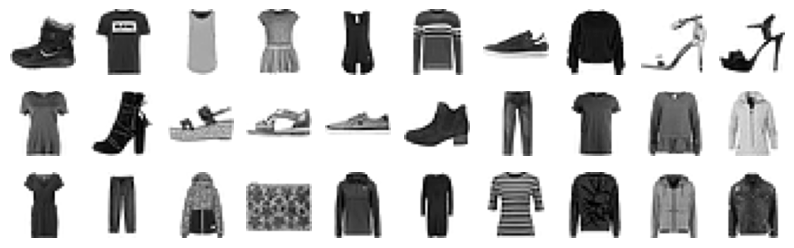

In [58]:
fig,axs = plt.subplots(3,10,figsize=(10,3))
for i in range(3):
    for j in range(10):
        axs[i][j].imshow(train_input[10*i+j],cmap='gray_r')
        axs[i][j].axis('off')
plt.show()

In [59]:
train_scaled = train_input/255.0
# train_scaled = train_scaled.reshape(-1,28*28) # flatten 28,28 할거면 불필요.
train_scaled.shape
train_target[10:20]

array([0, 9, 5, 5, 7, 9, 1, 0, 6, 4], dtype=uint8)

In [60]:
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [61]:
# 모델결정        model = keras.Sequential()
# flatten층 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가    model.add(keras.layers.Dense(100,activation='relu'))
# Dense층 추가    model.add(keras.layers.Dense(10,activation='softmax'))
# 구성확인        model.summary()
# 모델설정        model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델훈련        model.fit(train_scaled,train_target,batch_size=32,epochs=5)
# 모델평가        model.evaluate(val_scaled,val_target)

In [62]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

>epochs =20 훈련세트시에는 정확도가 높아짐.
- 검증세트를 가지고 정확도 측정

In [64]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌 때마다 loss, accuracy 값을 저장
history = model.fit(train_scaled,train_target,epochs=5)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step - accuracy: 0.7687 - loss: 0.6663
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.8567 - loss: 0.4043
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - accuracy: 0.8706 - loss: 0.3578
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 0.8834 - loss: 0.3236
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.8869 - loss: 0.3045


In [65]:
#history keys index를 확인
history.history.keys()
history.history['loss']

[0.5246122479438782,
 0.3946380317211151,
 0.3531004786491394,
 0.3243390619754791,
 0.30409058928489685]

In [66]:
# train세트 검증데이터(손실, 정확) 그래프 history.history

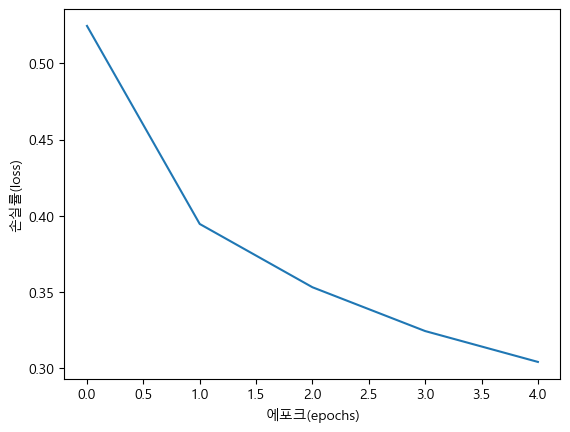

In [67]:
plt.plot(history.history['loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')
plt.savefig('m0529_03',dpi=300)
plt.show()

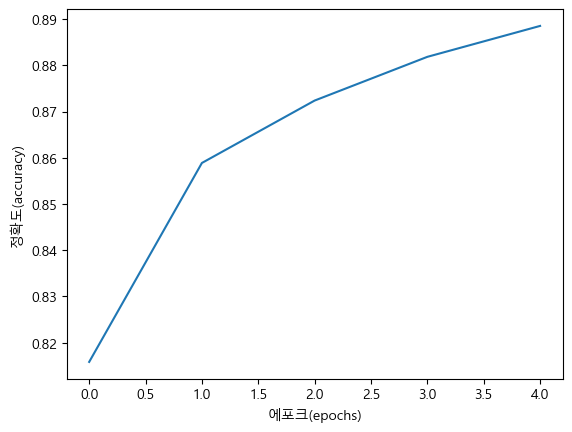

In [68]:
# 정확도 그래프
plt.plot(history.history['accuracy'])
plt.xlabel('에포크(epochs)')
plt.ylabel('정확도(accuracy)')
# plt.savefig('m0529_03',dpi=300)
plt.show()

In [69]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.8796 - loss: 0.3376


[0.3369826376438141, 0.8797500133514404]

In [70]:
# model.fit - loss,accuracy 정보를 리턴
# 검증세트도 함께 검증 - history 정보로 받을 수 있음
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌 때마다 loss, accuracy 값을 저장
history = model.fit(train_scaled,train_target,epochs=20, validation_data=(val_scaled,val_target))




Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 924us/step - accuracy: 0.8947 - loss: 0.2922 - val_accuracy: 0.8836 - val_loss: 0.3285
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.9005 - loss: 0.2716 - val_accuracy: 0.8810 - val_loss: 0.3306
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.9020 - loss: 0.2642 - val_accuracy: 0.8846 - val_loss: 0.3188
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 0.9094 - loss: 0.2454 - val_accuracy: 0.8894 - val_loss: 0.3140
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step - accuracy: 0.9106 - loss: 0.2415 - val_accuracy: 0.8869 - val_loss: 0.3176
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - accuracy: 0.9098 - loss: 0.2432 - val_accuracy: 0.8827 - val_loss: 0.3380
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - accuracy: 0.9170 - loss: 0.2241 - val_accuracy: 0.8799 - val_loss: 0.3480
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - accuracy: 0.9176 -

In [72]:
history.history    # 총 4개 속성

{'accuracy': [0.8931666612625122,
  0.89864581823349,
  0.9025208353996277,
  0.9073125123977661,
  0.909375011920929,
  0.9116666913032532,
  0.9146249890327454,
  0.9177708625793457,
  0.9200208187103271,
  0.9232708215713501,
  0.9262083172798157,
  0.9264166951179504,
  0.9279999732971191,
  0.9323750138282776,
  0.9317916631698608,
  0.9334791898727417,
  0.9361458420753479,
  0.9361875057220459,
  0.9380416870117188,
  0.9384791851043701],
 'loss': [0.29157137870788574,
  0.2748483419418335,
  0.2633785307407379,
  0.2519964277744293,
  0.2434225082397461,
  0.2356610745191574,
  0.2291298359632492,
  0.2211163491010666,
  0.2146798074245453,
  0.2071901261806488,
  0.20119403302669525,
  0.1983063966035843,
  0.1935431957244873,
  0.18588179349899292,
  0.1832500547170639,
  0.17798247933387756,
  0.17318294942378998,
  0.16947293281555176,
  0.16699127852916718,
  0.16212312877178192],
 'val_accuracy': [0.8835833072662354,
  0.8809999823570251,
  0.8845833539962769,
  0.8894166

Text(0, 0.5, '손실률(loss)')

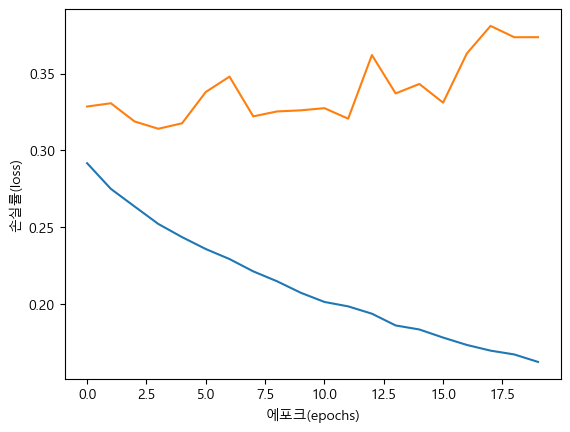

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')

Text(0, 0.5, '손실률(loss)')

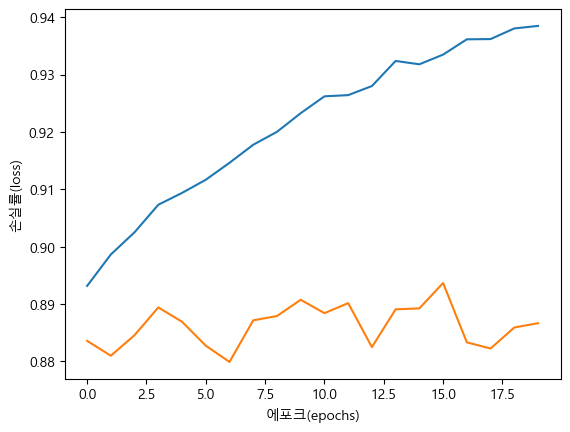

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')
